# Activation Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
x = np.arange(-10, 10, 0.01)

In [3]:
def plot(func, yaxis=(-1.4, 1.4)):
    plt.ylim(yaxis)
    plt.locator_params(nbins=5)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axhline(lw=1, c='black')
    plt.axvline(lw=1, c='black')
    plt.grid(alpha=0.4, ls='-.')
    plt.box(on=None)
    plt.plot(x, func(x), c='b', lw=3)

## Binary Step

$$
f(x) = \left\{
        \begin{array}{lll}
            0 & for & x \leq 0  \\
            1 & for & x > 0
        \end{array}
    \right.
$$

$$
f'(x) = \left\{
        \begin{array}{lll}
            0 & for & x \neq 0  \\
            ? & for & x = 0
        \end{array}
    \right.
$$

In [4]:
binary_step = np.vectorize(lambda x: 1 if x > 0 else 0, otypes=[np.float])

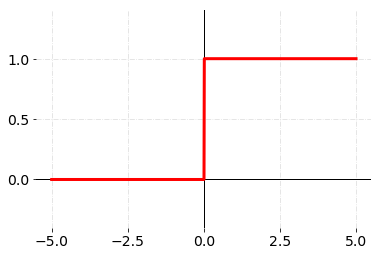

In [5]:
plot(binary_step, yaxis=(-0.4, 1.4))

## Piecewise Linear

$$
f(x) = \left\{
        \begin{array}{lll}
            0 & for & x < x_{min} \\
            mx+b & for & x_{min} \leq x \leq x_{max}  \\
            1 & for & x > x_{max}
        \end{array}
    \right.
$$

$$
f'(x) = \left\{
        \begin{array}{lll}
            0 & for & x < x_{min} \\
            m & for & x_{min} \leq x \leq x_{max}  \\
            0 & for & x > x_{max}
        \end{array}
    \right.
$$

In [6]:
piecewise_linear = np.vectorize(lambda x: 1 if x > 3 else 0 if x < -3 else 1/6*x+1/2, otypes=[np.float])

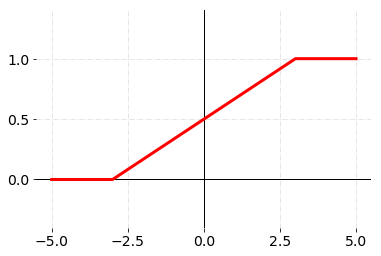

In [7]:
plot(piecewise_linear, yaxis=(-0.4, 1.4))

## Bipolar

$$
f(x) = \left\{
        \begin{array}{lll}
            -1 & for & x \leq 0  \\
            1 & for & x > 0
        \end{array}
    \right.
$$

$$
f'(x) = \left\{
        \begin{array}{lll}
            0 & for & x \neq 0  \\
            ? & for & x = 0
        \end{array}
    \right.
$$

In [8]:
bipolar = np.vectorize(lambda x: 1 if x > 0 else -1, otypes=[np.float])

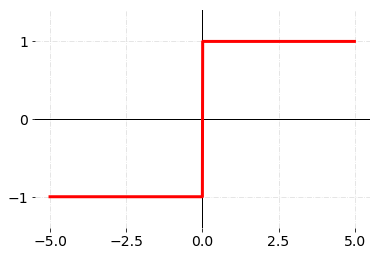

In [9]:
plot(bipolar)

## Sigmoid

$$
f(x)={\frac {1}{1+e^{-x}}}
$$

$$
f'(x)=f(x)(1-f(x))
$$

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    f = 1 / (1 + np.exp(-x))
    return f*(1-f)

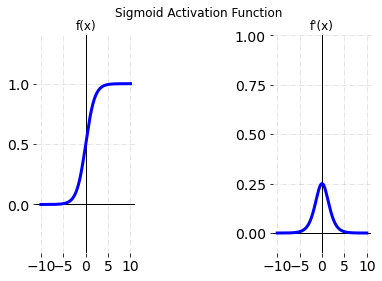

In [8]:
plt.suptitle("Sigmoid Activation Function")
plt.subplot(1,3,1)
plt.title("f(x)")
plot(sigmoid, yaxis=(-0.4, 1.4))
plt.subplot(1,3,3)
plt.title("f'(x)")
plot(dsigmoid,yaxis=(-0.1,1.0))

## Bipolar Sigmoid

$$
f(x)={\frac {1-e^{-x}}{1+e^{-x}}}
$$

$$
f'(x)={\frac {2e^x}{(e^x+1)^2}}
$$

In [10]:
def bipolar_sigmoid(x):
    return (1 - np.exp(-x)) / (1 + np.exp(-x))

def dbipolar_sigmoid(x):
    return (2 * np.exp(x)) / (np.exp(x) + 1)**2

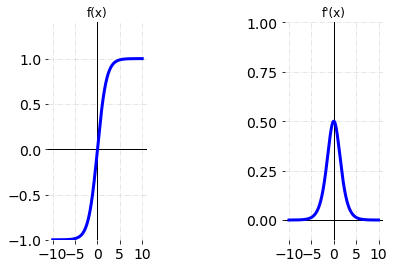

In [14]:
plt.subplot(1,3,1)
plt.title("f(x)")
plot(bipolar_sigmoid, yaxis=(-1.0, 1.4))
plt.subplot(1,3,3)
plt.title("f'(x)")
plot(dbipolar_sigmoid,yaxis=(-0.1,1.0))

## Hyperbolic Tangent, TanH

$$
f(x)={\frac {2}{1+e^{-2x}}}-1
$$

$$
f'(x)=1-f(x)^2
$$

In [16]:
def tanh(x):
    return 2 / (1 + np.exp(-2 * x)) -1

def dtanh(x):
    f = 2 / (1 + np.exp(-2 * x)) -1
    return 1 - f*f

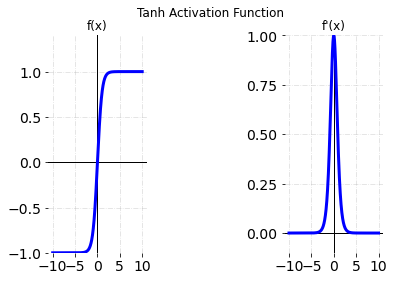

In [18]:
plt.suptitle("Tanh Activation Function")
plt.subplot(1,3,1)
plt.title("f(x)")
plot(tanh, yaxis=(-1.0, 1.4))
plt.subplot(1,3,3)
plt.title("f'(x)")
plot(dtanh,yaxis=(-0.1,1.0))

## Arctangent, ArcTan

$$
f(x)=tan^{-1}(x)
$$

$$
f'(x)={\frac {1}{1+x^2}}
$$

In [20]:
def arctan(x):
    return np.arctan(x)

def darctan(x):
    return 1 / (1 + x**2)

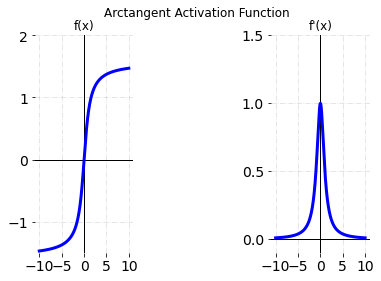

In [23]:
plt.suptitle("Arctangent Activation Function")
plt.subplot(1,3,1)
plt.title("f(x)")
plot(arctan, yaxis=(-1.5, 2.0))
plt.subplot(1,3,3)
plt.title("f'(x)")
plot(darctan,yaxis=(-0.1,1.5))

## Rectified Linear Units, ReLU

$$
f(x) = \left\{
        \begin{array}{lll}
            0 & for & x \leq 0  \\
            x & for & x > 0
        \end{array}
    \right.
$$

$$
f'(x) = \left\{
        \begin{array}{lll}
            0 & for & x \leq 0  \\
            1 & for & x > 0
        \end{array}
    \right.
$$

In [24]:
relu = np.vectorize(lambda x: x if x > 0 else 0, otypes=[np.float])
drelu = np.vectorize(lambda x: 1 if x > 0 else 0, otypes=[np.float])

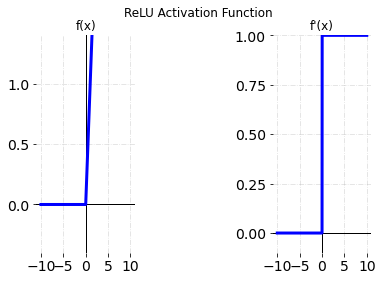

In [29]:
plt.suptitle("ReLU Activation Function")

plt.subplot(1,3,1)
plt.title("f(x)")
plot(relu, yaxis=(-0.4, 1.4))
plt.subplot(1,3,3)
plt.title("f'(x)")
plot(drelu,yaxis=(-0.1,1.0))

## Leaky Rectified Linear Units, Leaky ReLU

$$
f(x) = \left\{
        \begin{array}{lll}
            ax & for & x \leq 0  \\
            x & for & x > 0
        \end{array}
    \right.
$$

$$
f'(x) = \left\{
        \begin{array}{lll}
            a & for & x \leq 0  \\
            1 & for & x > 0
        \end{array}
    \right.
$$

In [31]:
leaky_relu = np.vectorize(lambda x: max(0.1 * x, x), otypes=[np.float])
dleaky_relu = np.vectorize(lambda x: 0.1 if x <= 0 else 1, otypes=[np.float])

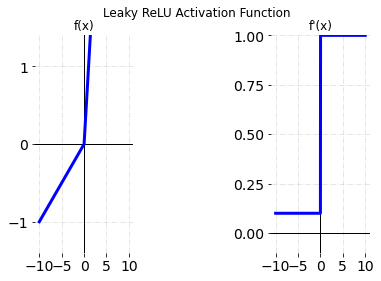

In [33]:
plt.suptitle("Leaky ReLU Activation Function")

plt.subplot(1,3,1)
plt.title("f(x)")
plot(leaky_relu)
plt.subplot(1,3,3)
plt.title("f'(x)")
plot(dleaky_relu,yaxis=(-0.1,1.0))

Parametric ReLU is similar to Leaky ReLU but coefficient of leakage is learned as parameter of neural network

## Exponential Linear Units, ELU

$$
f(x) = \left\{
        \begin{array}{lll}
            a(e^x-1) & for & x \leq 0  \\
            x & for & x > 0
        \end{array}
    \right.
$$

$$
f'(x) = \left\{
        \begin{array}{lll}
            f(x)+a & for & x \leq 0  \\
            1 & for & x > 0
        \end{array}
    \right.
$$

In [34]:
elu = np.vectorize(lambda x: x if x > 0 else 0.5 * (np.exp(x) - 1), otypes=[np.float])
delu = np.vectorize(lambda x: 1 if x > 0 else elu(x) + 0.5, otypes=[np.float])

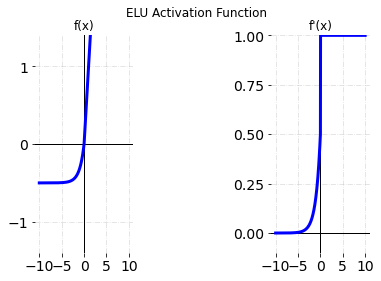

In [35]:
plt.suptitle("ELU Activation Function")

plt.subplot(1,3,1)
plt.title("f(x)")
plot(elu)
plt.subplot(1,3,3)
plt.title("f'(x)")
plot(delu,yaxis=(-0.1,1.0))

## SoftPlus

$$
f(x)=ln(1+e^x)
$$

$$
f'(x)={\frac {1}{1+e^{-x}}}
$$

In [37]:
def softplus(x):
    return np.log(1+np.exp(x))

def dsoftplus(x):
    return 1/(1 + np.exp(-x))

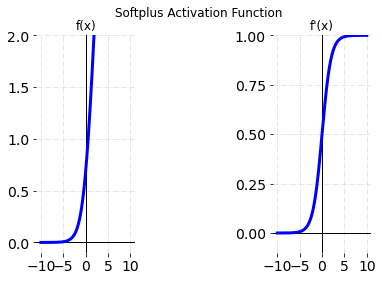

In [39]:
plt.suptitle("Softplus Activation Function")
plt.subplot(1,3,1)
plt.title("f(x)")
plot(softplus,yaxis=(-0.1,2.0))
plt.subplot(1,3,3)
plt.title("f'(x)")
plot(dsoftplus,yaxis=(-0.1,1.0))

# Swish

$$
f(x) = x*sigmoid(x)
$$

$$
f'(x) = {\frac {1 + e^{-x}*(1 + x)}{(1 + e^{-x})^2}}
$$

In [40]:
def swish(x):
    return x * (1/(1 + np.exp(-x)))

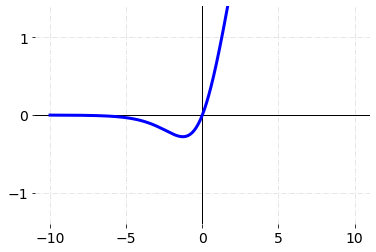

In [41]:
plot(swish)